In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
target = df["Survived"]
df.drop(columns="PassengerId",inplace=True)

# Intenciones 

En este EDA mi intencio es explorar las caracteristicas de las personas que sobreviven y la de las que no sobreviven 

**Preguntas Interesantes**

1. Ser Mujer mejoraba tus posibilidades de Supervivencia?
2. Que rango etario es el que mas sobrevivia
3. Tener un Status elevado en la sociedad mejoraba tus posibilidades de supervivencia?
4. Gastar mas dinero en Tickets mejoraba tus chances de sobrevivir?
5. Pertenecer a primera clase aumenta tus posibilidades de sobrevivir?
6. Tener hijos hace que tus posibilidades de supervivencia mejoren?
7. Existia camaraderia entre personas que embarcaban en el mismo puerto que mejorara sus chances de sobrevivir?

# Indice 
1. [Missing Values](#handeling-missing-values)
2. [Duplicated Values](#handeling-duplicates)
3. [Analisis de Tipo de Datos](#analisis-de-tipo-de-datos)
4. [Data Distribucion](#exploring-data-distributions)
5. [Numerical](#numerical-data)
6. [Categorical](#categorical-data)
7. [survivor's composition](#exploring-composition)
8. [Sex](#sex-survivement)
9. [Passanger Class](#pclass-survivement)
10. [Siblings and Children](#sibsp-survivement)
11. [Embarkation](#embarked-survivement)
12. [Fare](#fare-survivement)
13. [Category](#age-category-survivement)
14. [Name Titles](#exploring-name-titles)
15. [Summary](#summary)
16. [Relationships](#exploring-data-relationships)
17. [Categorical Survivemt](#exploring-the-relationships-between-categorical-data-and-survivement)
18. [Chi2](#chi-cuadrado)
19. [Anova](#anova)

# Handeling Missing Values

lo que se realizara es la eliminacion de cualquier columa con 30% o mas de datos faltantes y la imputacion de cualquier columna con menos del 30% se hara mediante la media o median foward fill  

In [6]:
(df.isna().sum()/len(df))*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [7]:
df.drop(columns="Cabin",inplace=True)

In [8]:
df["Embarked"].ffill(inplace=True)

In [9]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [10]:
(df.isna().sum()/len(df))*100

Survived    0.0
Pclass      0.0
Name        0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Ticket      0.0
Fare        0.0
Embarked    0.0
dtype: float64

Se imputo la edad con la media de la edad, se realizo foward fill para el lugar de embarcacion y se elimino la columna cambiana por tener mas del 77% de casos faltantes

# Handeling Duplicates

In [11]:
test = df.duplicated()
df[test]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


No se encontraron datos Duplicados

# Exploración de Distribuciones y Composiciones

## Separando variables categoricas de numericas y texto

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [13]:
df_numeric = df.select_dtypes(["int64","float64"])
df_objet = df.select_dtypes("object")
df_categorical = df.select_dtypes("object")

In [14]:
df_numeric.drop(columns="Survived", inplace=True)

In [15]:
#im moving Pclass, SibSp and Parch to a categorical df to have it separated
df_categorical["SibSp"] = df_numeric["SibSp"] 
df_categorical["Parch"] = df_numeric["Parch"] 
df_categorical["Pclass"] = df_numeric["Pclass"] 

df_categorical.drop(columns=["Name","Ticket"],inplace=True)
df_numeric.drop(columns=["SibSp","Parch","Pclass"],inplace=True)


In [16]:
df_numeric.head()

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500


In [17]:
df_objet.head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [18]:
df_categorical.head()

,Sex,Embarked,SibSp,Parch,Pclass
0,male,S,1,0,3
1,female,C,1,0,1
2,female,S,0,0,3
3,female,S,1,0,1
4,male,S,0,0,3


Se creo 3 datasets diferentes los cuales contienen los datos numericos, las variables categoricas (numericas y no numericas) y las variables no numericas para realizar analisis de las mismas 

# Handeling Outliers

## Numerical Data

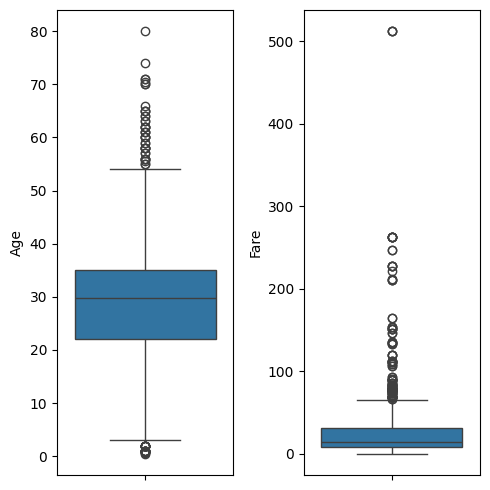

In [19]:
fig,ax = plt.subplots(nrows=1, ncols=2,figsize=(5, 5))

sns.boxplot(data=df_numeric["Age"],ax=ax[0])
sns.boxplot(data=df_numeric["Fare"],ax=ax[1])

plt.tight_layout()
plt.show()


In [20]:
# Age
first_quantile = df["Age"].quantile(0.25) 

third_quantile = df["Age"].quantile(0.75) 

iqr = third_quantile - first_quantile

lower_bound = first_quantile - 1.5 * iqr
upper_bound = third_quantile + 1.5 * iqr


df = df.loc[(df["Age"] >= lower_bound)&(df["Age"] <= upper_bound),:]

first_quantile = df["Fare"].quantile(0.25) 

third_quantile = df["Fare"].quantile(0.75) 

iqr = third_quantile - first_quantile

lower_bound = first_quantile - 1.5 * iqr
upper_bound = third_quantile + 1.5 * iqr


df = df.loc[(df["Fare"] >= lower_bound)&(df["Fare"] <= upper_bound),:]

## Categorical Data

### Visualizacion de Outliers

A continuacion se realiza una tabla de frecuencias para cada variable categorica de manera de poder detectar valores atipicos

In [21]:
print(
    df_categorical["Sex"].value_counts(),"\n\n",
    df_categorical["Embarked"].value_counts(),"\n\n",
    df_categorical["SibSp"].value_counts(),"\n\n"
)

Sex
male      577
female    314
Name: count, dtype: int64 

 Embarked
S    644
C    169
Q     78
Name: count, dtype: int64 

 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64 




In [22]:
print(
    df_categorical["Parch"].value_counts(),"\n\n",
    df_categorical["Pclass"].value_counts())

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64 

 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


A continuacion se realiza una visualizacion usando graficos de caja  y de dispersion 

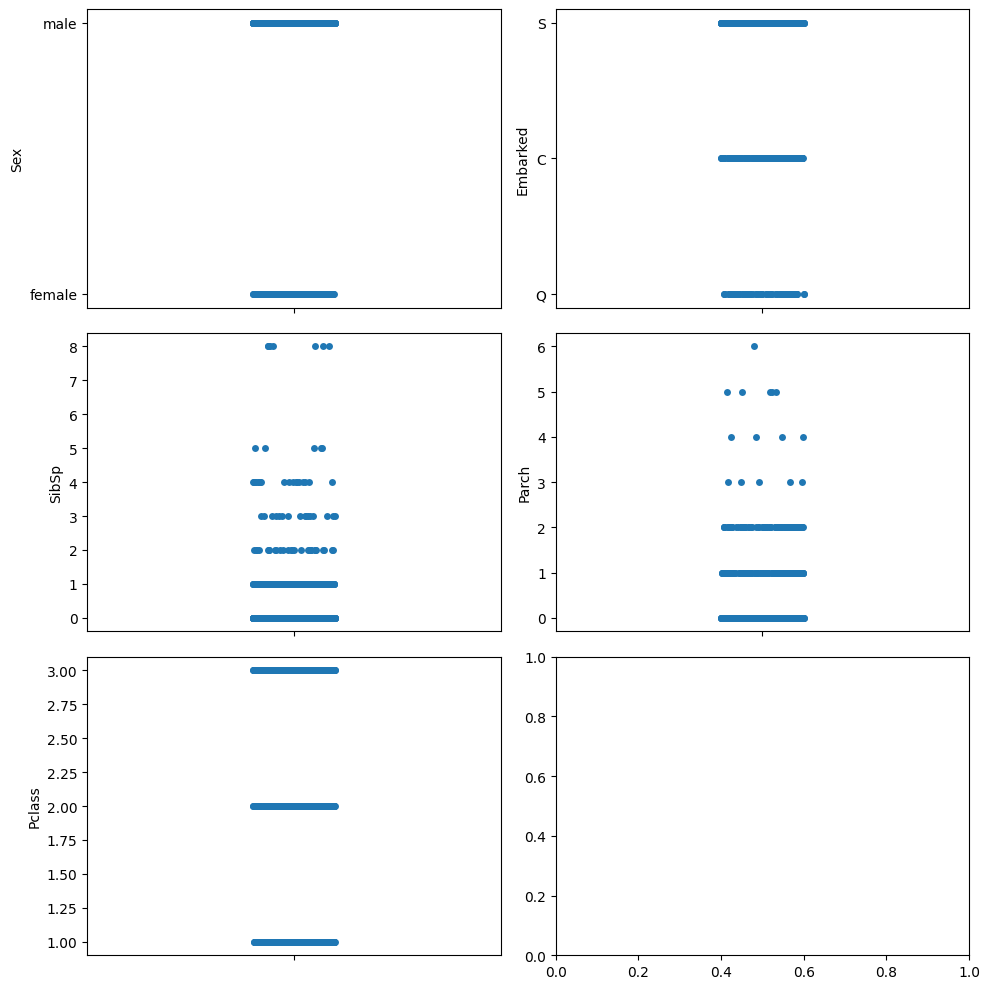

In [23]:
fig,ax = plt.subplots(nrows=3, ncols=2,figsize=(10, 10))

#Sex	Embarked	SibSp	Parch	Pclass

sns.stripplot(data=df_categorical["Sex"], ax=ax[0,0])
sns.stripplot(data=df_categorical["Embarked"], ax=ax[0,1])
sns.stripplot(data=df_categorical["SibSp"], ax=ax[1,0])
sns.stripplot(data=df_categorical["Parch"], ax=ax[1,1])
sns.stripplot(data=df_categorical["Pclass"], ax=ax[2,0])

plt.tight_layout()
plt.show()

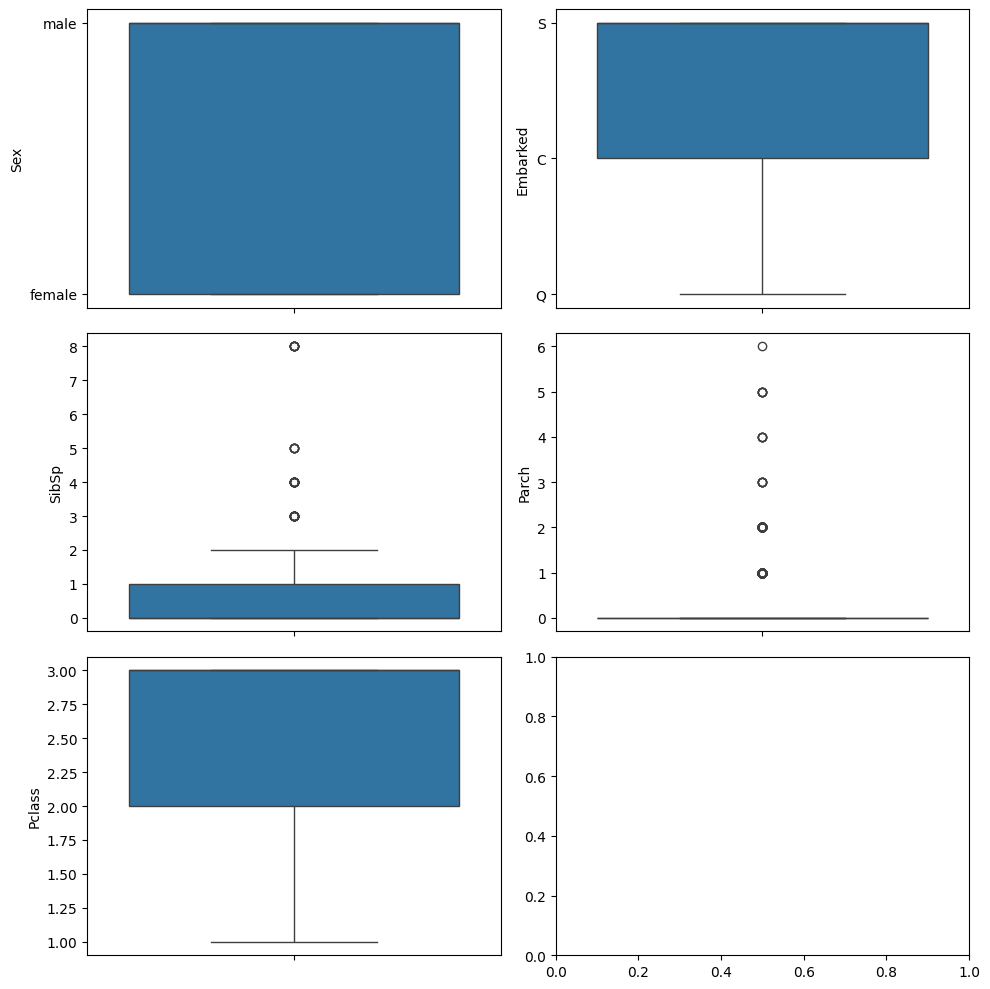

In [24]:
fig,ax = plt.subplots(nrows=3, ncols=2,figsize=(10, 10))

#Sex	Embarked	SibSp	Parch	Pclass

sns.boxplot(data=df_categorical["Sex"], ax=ax[0,0])
sns.boxplot(data=df_categorical["Embarked"], ax=ax[0,1])
sns.boxplot(data=df_categorical["SibSp"], ax=ax[1,0])
sns.boxplot(data=df_categorical["Parch"], ax=ax[1,1])
sns.boxplot(data=df_categorical["Pclass"], ax=ax[2,0])

plt.tight_layout()
plt.show()

### Pruebas Formales de Outliers

Para corroborar utilizare el zscore usando las frecuencias para detectar que categoria tien frecuencias poco comunies que pueden ser consideradas outliers

In [25]:
Sex = df_categorical["Sex"].value_counts()
Embarked = df_categorical["Embarked"].value_counts()
SibSb = df_categorical["SibSp"].value_counts()
Parch = df_categorical["Parch"].value_counts()
Pclass = df_categorical["Pclass"].value_counts()

In [26]:
def categoric_z_score(categorie):
    mean = sum(categorie)/len(categorie)
    suma = 0    
    zvalues = {}
    for item in categorie:
        suma += (item-mean)**2
    
    sd = np.sqrt(suma/len(categorie))

    for key ,value in categorie.items():
        zvalues[key] = (value - mean)/sd
    return zvalues

In [27]:
def catch_categorical_outlier(dict):
    for key, value in dict.items():
        if abs(value) > 3:
            print(f"OUTLIER : {key} : {value} \n\n")

In [28]:
# SEX z-score
Sex_Zscore = categoric_z_score(Sex)
#Embarked
Embarked_Zscore = categoric_z_score(Embarked)
#SibSb
SibSb_Zscore = categoric_z_score(SibSb)
#Parch
Parch_Zscore = categoric_z_score(Parch)
#Pclass
Pclass_Zscore = categoric_z_score(Pclass)

print("Sex zscore: ",catch_categorical_outlier(Sex_Zscore),"\n\n","Embarked z-score: ",catch_categorical_outlier(Embarked_Zscore),"\n\n","SibSb z-score: ",catch_categorical_outlier(SibSb_Zscore),"\n\n","Parch z-score: ",catch_categorical_outlier(Parch_Zscore),"\n\n",catch_categorical_outlier(Pclass_Zscore))

Sex zscore:  None 

 Embarked z-score:  None 

 SibSb z-score:  None 

 Parch z-score:  None 

 None


In [29]:
Sex

Sex
male      577
female    314
Name: count, dtype: int64

In [30]:
#IQR para frecuencias 
# Age
first_quantile = df["Age"].quantile(0.25) 

third_quantile = df["Age"].quantile(0.75) 

iqr = third_quantile - first_quantile

lower_bound = first_quantile - 1.5 * iqr
upper_bound = third_quantile + 1.5 * iqr

## Exploring Data Distributions

### Numerical Data

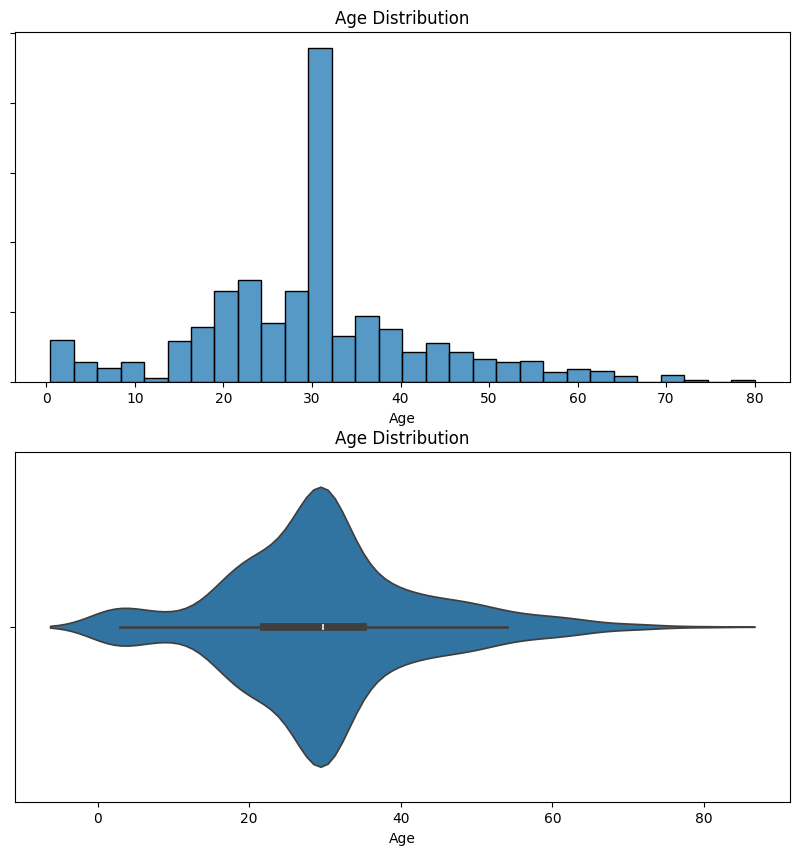

In [31]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(10, 10))

g1 = sns.histplot(data=df_numeric["Age"],ax=ax[0]) #creates graph

g1.set(yticklabels=[])  # remove the tick labels
g1.set(title='Age Distribution')  # add a title
g1.set(ylabel=None)  # remove the axis label

g2 = sns.violinplot(x=df_numeric["Age"],ax=ax[1]) #creates graph

g2.set(yticklabels=[])  # remove the tick labels
g2.set(title='Age Distribution')  # add a title
g2.set(ylabel=None)  # remove the axis label

plt.show()

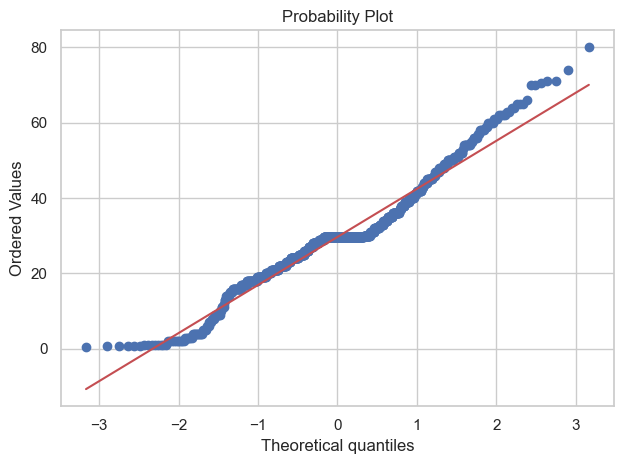

In [32]:
import scipy.stats as stats
sns.set(style="whitegrid")
stats.probplot(df_numeric["Age"].dropna(), dist="norm", plot=plt)
# Ajuste para el layout
plt.tight_layout()
plt.show()

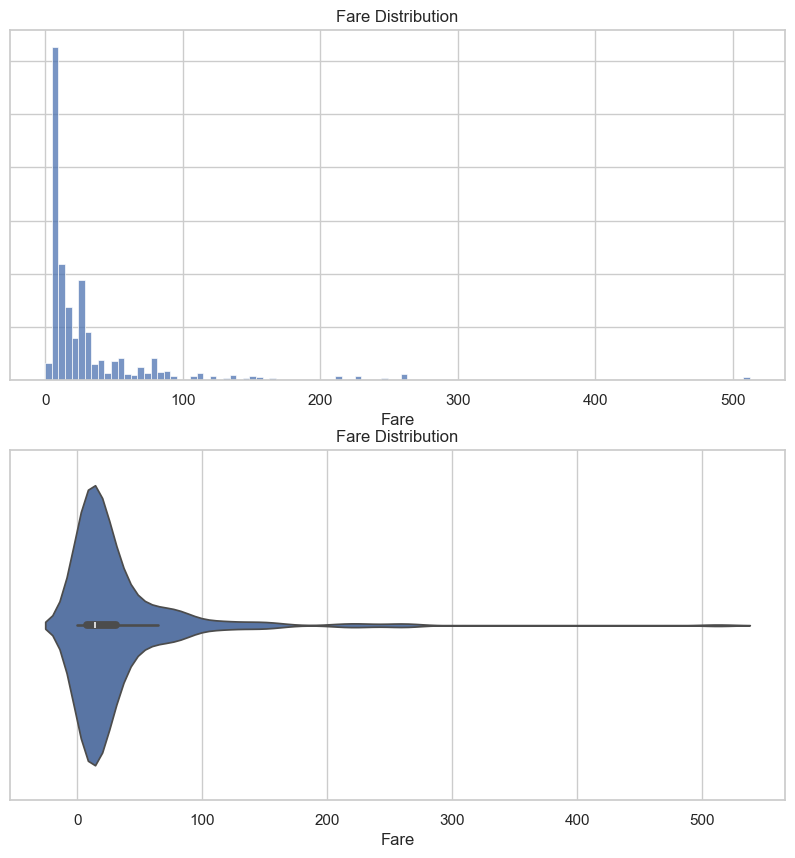

In [33]:
fig, ax = plt.subplots(nrows=2, ncols=1,figsize=(10, 10))

g1 = sns.histplot(data=df_numeric["Fare"],ax=ax[0]) #creates graph

g1.set(yticklabels=[])  # remove the tick labels
g1.set(title='Fare Distribution')  # add a title
g1.set(ylabel=None)  # remove the axis label


g2 = sns.violinplot(x=df_numeric["Fare"],ax=ax[1]) #creates graph

g2.set(yticklabels=[])  # remove the tick labels
g2.set(title='Fare Distribution')  # add a title
g2.set(ylabel=None)  # remove the axis label

plt.show()

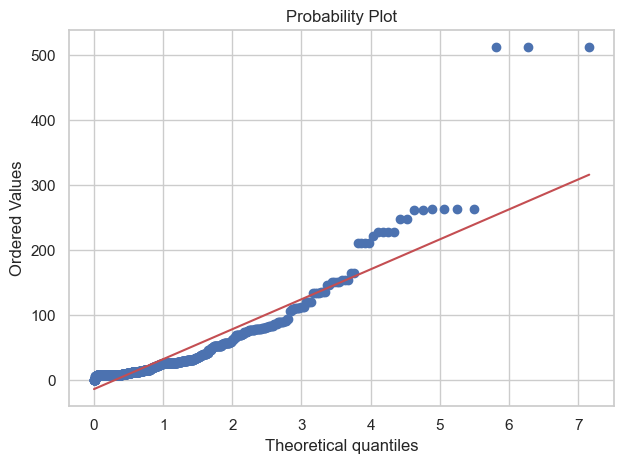

In [34]:
import scipy.stats as stats
sns.set(style="whitegrid")
stats.probplot(df_numeric["Fare"].dropna(), dist="expon", plot=plt)
# Ajuste para el layout
plt.tight_layout()
plt.show()

**Summary** : veo que en la Distribucion de los datos numericos encuntro que las edades siguen uan distribucion que parece ser ciertamente normal pero de todas maneras encuentro una acumulacion de valores bajos lo que indica una buena parte de la poblacion eran muy jovenes. 

Ademas con respecto a Fare la cantidad de dinero gastado veo que es una distribucion exponenecial con cola hacia la derecha lo que quiere decir que los valores se acumulan a la izquierda pero existen outliers de gran valor, esto me dice 2 cosas :

1. Que era bastante mas habitual gastar poco dinero.
2. Habia un reducido numero de personas que podian permitirse gastar una gran cantidad de dinero 

### Categorical Data

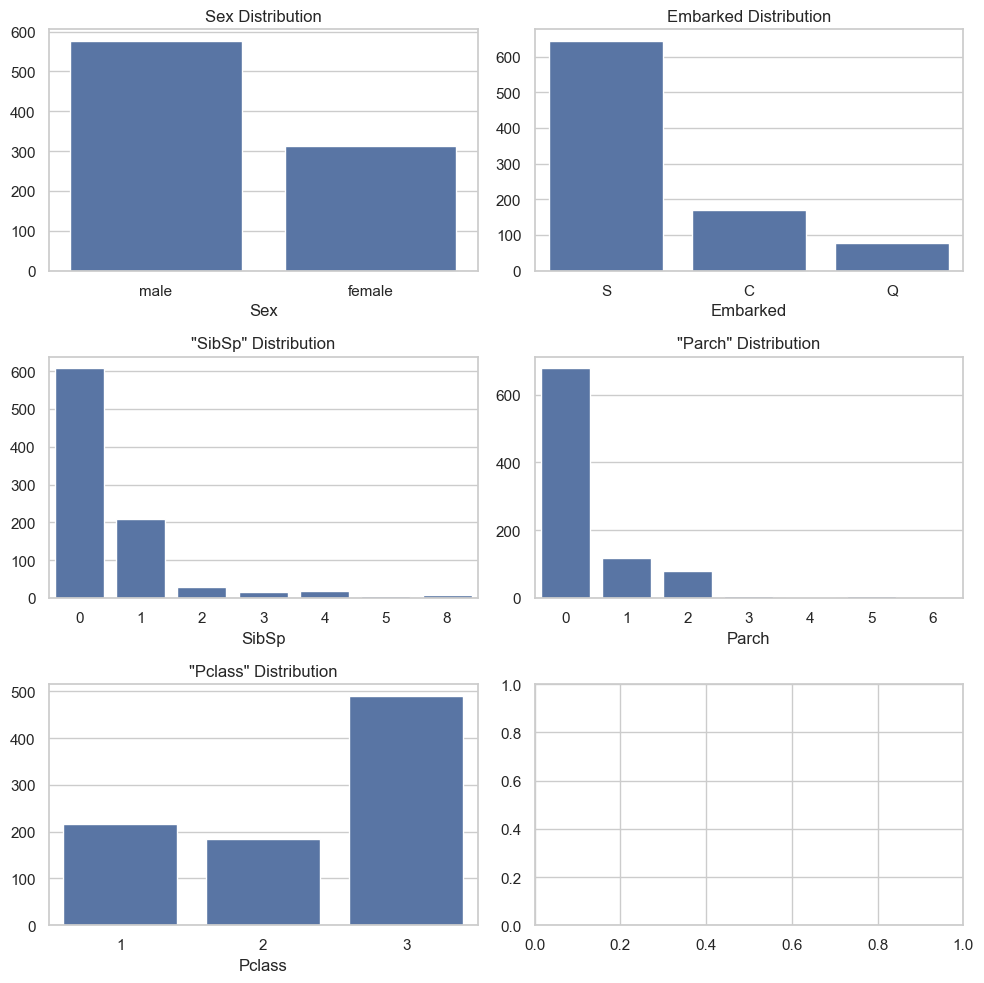

In [35]:
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(10, 10))

g1 = sns.countplot(x=df_categorical["Sex"],ax=ax[0,0]) #creates graph


g1.set(title='Sex Distribution')  # add a title
g1.set(ylabel=None)  # remove the axis label

g2 = sns.countplot(x=df_categorical["Embarked"],ax=ax[0,1]) #creates graph


g2.set(title='Embarked Distribution')  # add a title
g2.set(ylabel=None)  # remove the axis label

g3 = sns.countplot(x=df_categorical["SibSp"],ax=ax[1,0]) #creates graph

g3.set(title='"SibSp" Distribution')  # add a title
g3.set(ylabel=None)  # remove the axis label


g4 = sns.countplot(x=df_categorical["Parch"],ax=ax[1,1]) #creates graph

g4.set(title='"Parch" Distribution')  # add a title
g4.set(ylabel=None)  # remove the axis label

g5 = sns.countplot(x=df_categorical["Pclass"],ax=ax[2,0]) #creates graph

g5.set(title='"Pclass" Distribution')  # add a title
g5.set(ylabel=None)  # remove the axis label

fig.tight_layout()
plt.show()

## Exploring Composition

### Analyzing Absolutes

In [36]:
bins = [-np.inf,1,3,5,12,18,25,64,np.inf]
labels = ["baby","Toddler","Preschool","GrandSchooler","Teen","Young Adult","Adult","Senior"]

df["Age_Category"] = pd.cut(df["Age"],bins,labels=labels)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Category
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Young Adult
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Adult
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Adult
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Adult
5,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,Adult


In [37]:
bins = [-np.inf,8,15,31,np.inf]
labels = ["bajo","medio","medio-alto","alto"]

df["Fare_Category"] = pd.cut(df["Fare"],bins,labels=labels)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Category,Fare_Category
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Young Adult,bajo
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Adult,bajo
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Adult,alto
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Adult,medio
5,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,Adult,medio


In [38]:
# Regular expression pattern to match common name titles
pattern = r"Mr\.|Master\.|Mrs\.|Miss\.\s+"

df.loc[~df["Name"].str.contains(pattern, regex=True),"Title_Name"] = 1
df["Title_Name"].fillna(0, inplace=True)

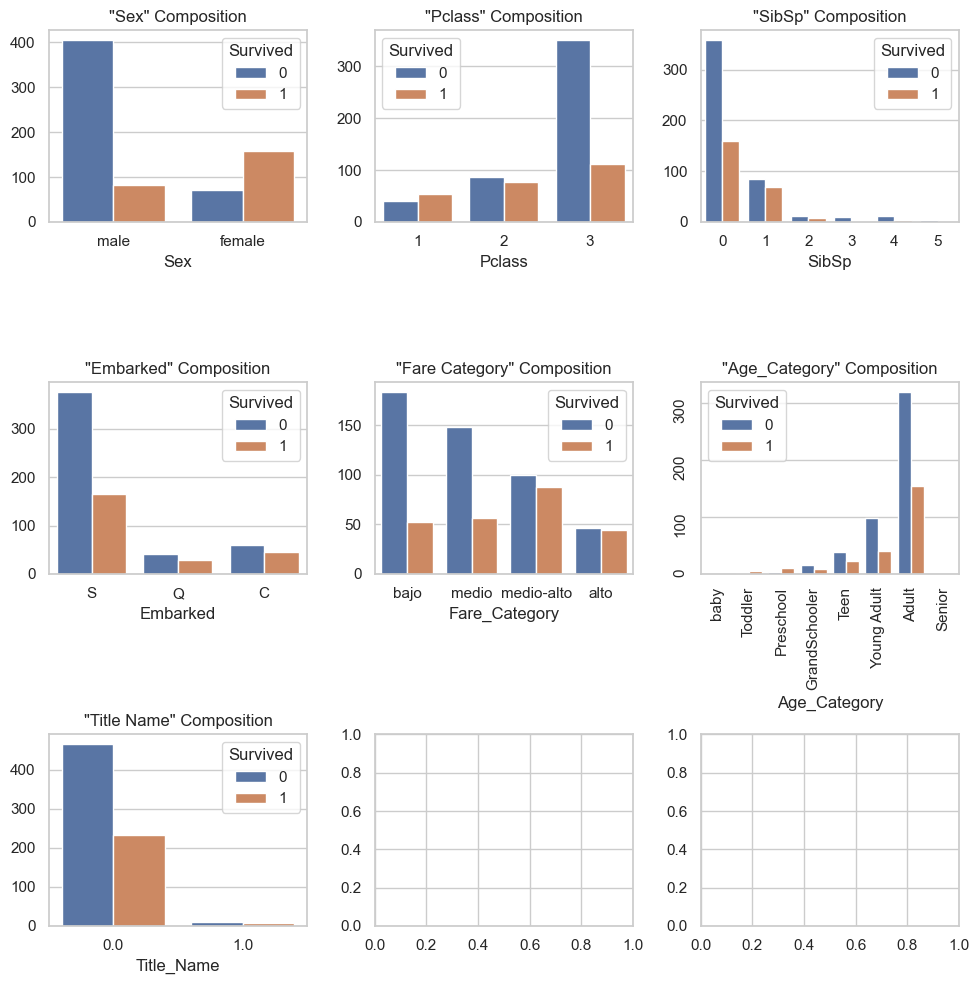

In [39]:
#Sex and Survivement
fig, ax = plt.subplots(nrows=3,ncols=3,figsize=(10,10))

g1 = sns.countplot( data=df, x="Sex", hue="Survived",ax=ax[0,0])
g1.set(title='"Sex" Composition')  # add a title
g1.set(ylabel=None)  # remove the axis label

g2 = sns.countplot( data=df, x="Pclass", hue="Survived",ax=ax[0,1])
g2.set(title='"Pclass" Composition')  # add a title
g2.set(ylabel=None)  # remove the axis label

g3 = sns.countplot( data=df, x="SibSp", hue="Survived",ax=ax[0,2])
g3.set(title='"SibSp" Composition')  # add a title
g3.set(ylabel=None)  # remove the axis label

g4 = sns.countplot( data=df, x="Embarked", hue="Survived",ax=ax[1,0])
g4.set(title='"Embarked" Composition')  # add a title
g4.set(ylabel=None)  # remove the axis label

g5 = sns.countplot( data=df, x="Fare_Category", hue="Survived",ax=ax[1,1])
g5.set(title='"Fare Category" Composition')  # add a title
g5.set(ylabel=None)  # remove the axis label

g6 = sns.countplot( data=df, x="Age_Category", hue="Survived",ax=ax[1,2])
g6.set(title='"Age_Category" Composition')  # add a title
g6.set(ylabel=None)  # remove the axis label
ax[1,2].tick_params(labelrotation=90)  # remove the axis label

g7 = sns.countplot(data=df,x="Title_Name",hue="Survived", ax=ax[2,0])
g7.set(title='"Title Name" Composition')  # add a title
g7.set(ylabel=None)  # remove the axis label
plt.tight_layout()
plt.show()

### Analizing Percentiles

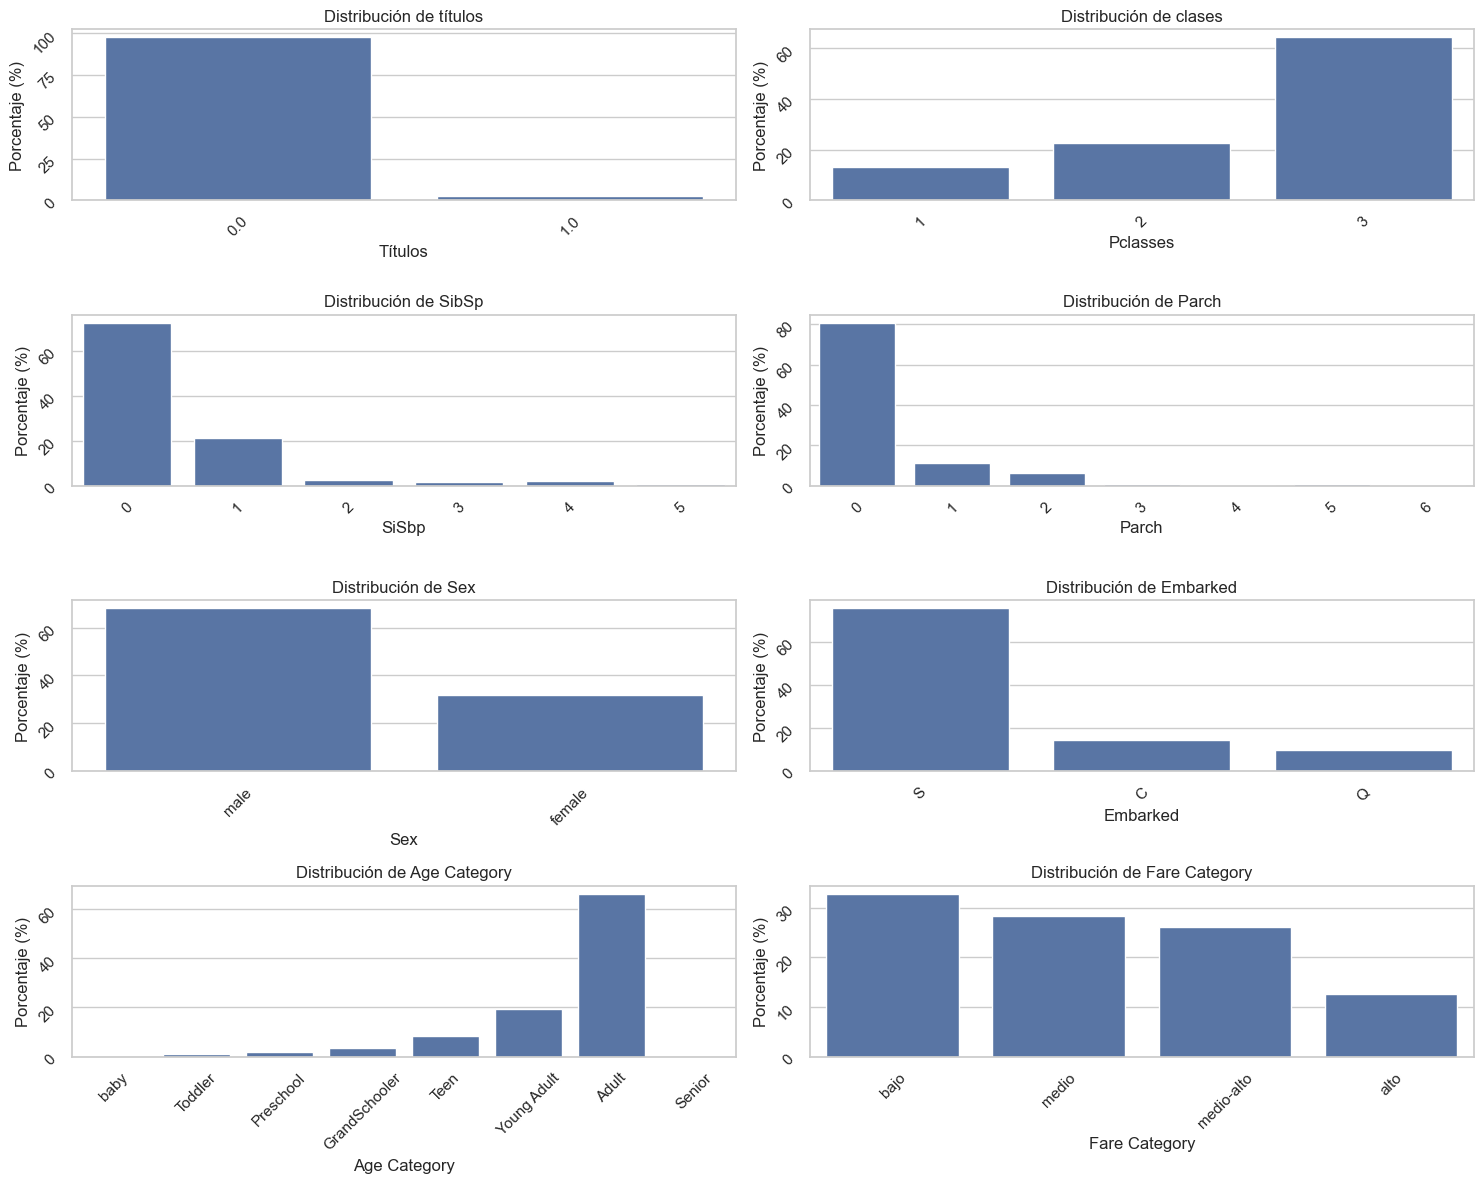

In [40]:
# Calculando los porcentajes (asumiendo que ya tienes los porcentajes en una serie llamada 'porcentajes')
porcentajes_title_name = (df.loc[:,"Title_Name"].value_counts()/sum(df.loc[:,"Title_Name"].value_counts().values))*100
porcentajes_Pclass = (df.loc[:,"Pclass"].value_counts()/sum(df.loc[:,"Pclass"].value_counts().values))*100
porcentajes_SibSp = (df.loc[:,"SibSp"].value_counts()/sum(df.loc[:,"SibSp"].value_counts().values))*100
porcentajes_Parch = (df.loc[:,"Parch"].value_counts()/sum(df.loc[:,"Parch"].value_counts().values))*100
porcentajes_Sex = (df.loc[:,"Sex"].value_counts()/sum(df.loc[:,"Sex"].value_counts().values))*100
porcentajes_Embarked = (df.loc[:,"Embarked"].value_counts()/sum(df.loc[:,"Embarked"].value_counts().values))*100
porcentajes_Age_Category = (df.loc[:,"Age_Category"].value_counts()/sum(df.loc[:,"Age_Category"].value_counts().values))*100
porcentajes_Fare_Category = (df.loc[:,"Fare_Category"].value_counts()/sum(df.loc[:,"Fare_Category"].value_counts().values))*100

# Creando el gráfico de barras
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,12))

g1 = sns.barplot(x=porcentajes_title_name.index, y=porcentajes_title_name,ax=ax[0,0])

# Personalizando el gráfico correctamente
g1.set_xlabel('Títulos')
g1.set_ylabel('Porcentaje (%)')
g1.set_title('Distribución de títulos')
g1.tick_params( labelrotation=45)

g2 = sns.barplot(x=porcentajes_Pclass.index, y=porcentajes_Pclass,ax=ax[0,1])

# Personalizando el gráfico correctamente
g2.set_xlabel('Pclasses')
g2.set_ylabel('Porcentaje (%)')
g2.set_title('Distribución de clases')
g2.tick_params( labelrotation=45)

g3 = sns.barplot(x=porcentajes_SibSp.index, y=porcentajes_SibSp,ax=ax[1,0])

# Personalizando el gráfico correctamente
g3.set_xlabel('SiSbp')
g3.set_ylabel('Porcentaje (%)')
g3.set_title('Distribución de SibSp')
g3.tick_params( labelrotation=45)

g4 = sns.barplot(x=porcentajes_Parch.index, y=porcentajes_Parch,ax=ax[1,1])

# Personalizando el gráfico correctamente
g4.set_xlabel('Parch')
g4.set_ylabel('Porcentaje (%)')
g4.set_title('Distribución de Parch')
g4.tick_params( labelrotation=45)

g5 = sns.barplot(x=porcentajes_Sex.index, y=porcentajes_Sex,ax=ax[2,0])

# Personalizando el gráfico correctamente
g5.set_xlabel('Sex')
g5.set_ylabel('Porcentaje (%)')
g5.set_title('Distribución de Sex')
g5.tick_params( labelrotation=45)

g6 = sns.barplot(x=porcentajes_Embarked.index, y=porcentajes_Embarked,ax=ax[2,1])

# Personalizando el gráfico correctamente
g6.set_xlabel('Embarked')
g6.set_ylabel('Porcentaje (%)')
g6.set_title('Distribución de Embarked')
g6.tick_params( labelrotation=45)

g7 = sns.barplot(x=porcentajes_Age_Category.index, y=porcentajes_Age_Category,ax=ax[3,0])

# Personalizando el gráfico correctamente
g7.set_xlabel('Age Category')
g7.set_ylabel('Porcentaje (%)')
g7.set_title('Distribución de Age Category')
g7.tick_params( labelrotation=45)

g8 = sns.barplot(x=porcentajes_Fare_Category.index, y=porcentajes_Fare_Category,ax=ax[3,1])

# Personalizando el gráfico correctamente
g8.set_xlabel('Fare Category')
g8.set_ylabel('Porcentaje (%)')
g8.set_title('Distribución de Fare Category')
g8.tick_params( labelrotation=45)


plt.tight_layout()
plt.show()

#### Summary

Se observa claramente que :
1. La poblacion mayormente no tiene titulos de nombre
2. La poblacion es mayormente de 3ra clase
3. La poblacion Mayormente no tiene hijos o hermanos
4. La poblacion Mayormente tiene Parch 0
5. La POblacion es Mayormente hombre 
6. La poblacion Embarco mayormente en el puerto S
7. La poblacion es Mayormente adulta 
8. La poblacion Gasto en un ticker mas  bien poco

# Interaction Analysis 

## Visualizaciones

### Exploring Relationship Between Numerical data

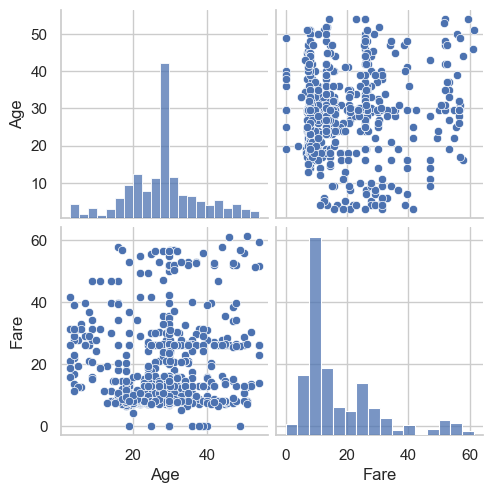

In [41]:
numerical = df.select_dtypes("number")
numerical.drop(columns=["Pclass","SibSp","Parch","Title_Name","Survived"],inplace=True)
sns.pairplot(data=numerical)
plt.show()

**Summary**: No encontramos ninguna relacion clara entre las variables numericas. Pero Podria resultar interesante realizar una clusterizacion entre el Fare (la plata que gastaron las personas) y la edad (Age) ya que pareciera existir al menos 3 marcados grupas quizas seria interesante explorar la sobrevivencia de estos grupos inclusive tratar estas calses en subclases.

### Exploring the Relationships between categorical data and Survivement

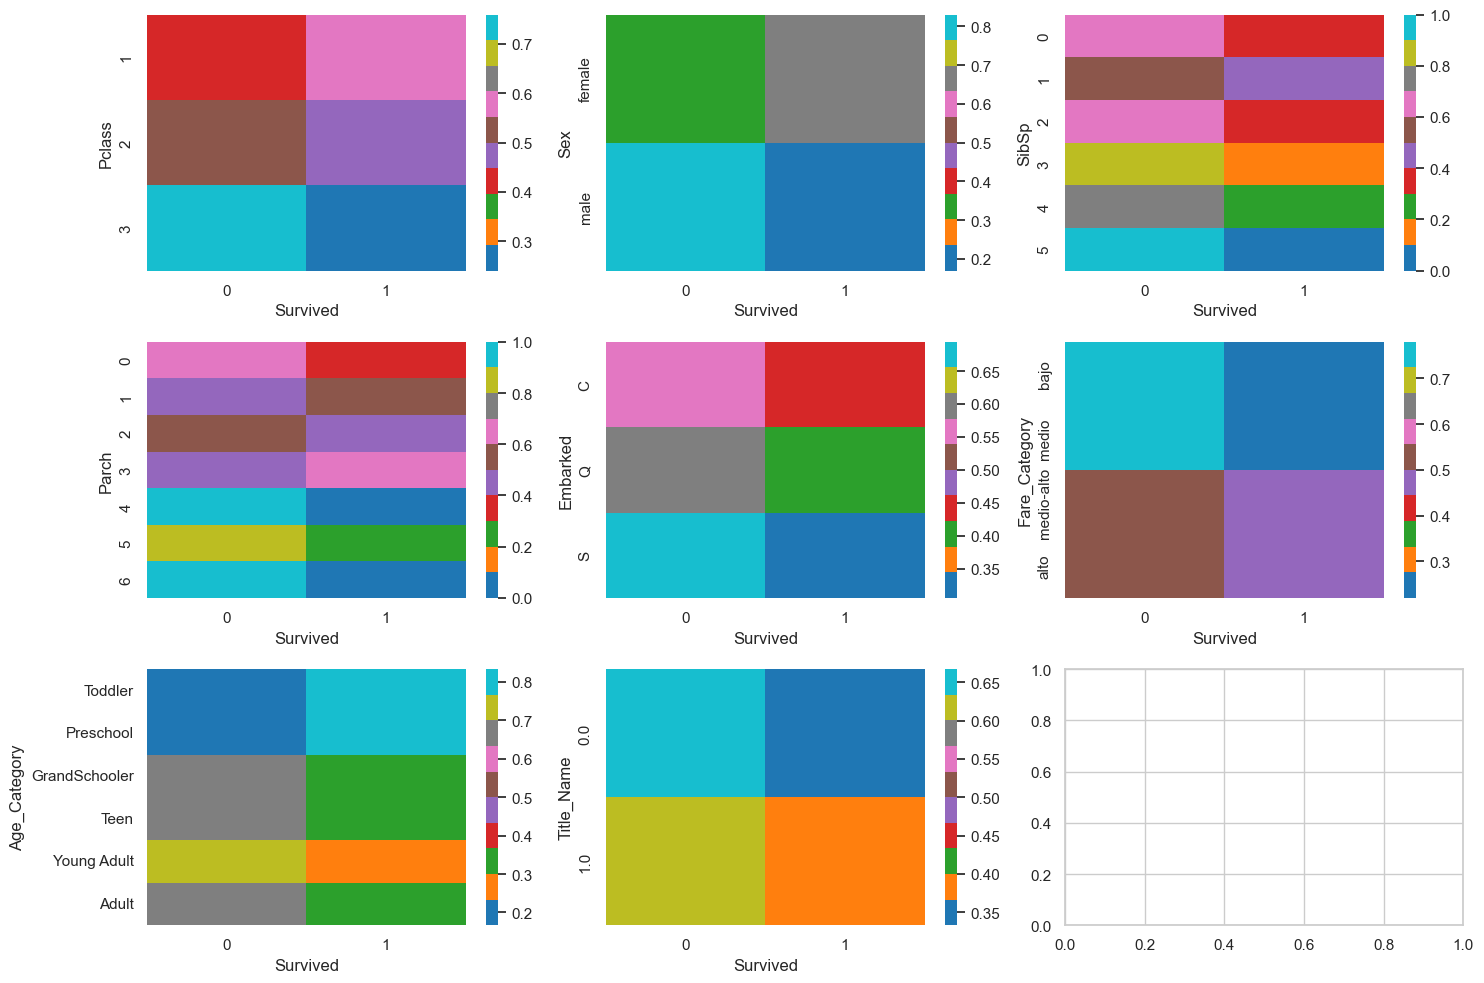

In [42]:
fig,ax = plt.subplots(nrows=3, ncols=3, figsize=(15,10))

sns.color_palette("hls", 8)

sns.heatmap(pd.crosstab(df['Pclass'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"), ax=ax[0,0])

sns.heatmap(pd.crosstab(df['Sex'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"), ax=ax[0,1])

sns.heatmap(pd.crosstab(df['SibSp'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"), ax=ax[0,2])

sns.heatmap(pd.crosstab(df['Parch'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"), ax=ax[1,0])

sns.heatmap(pd.crosstab(df['Embarked'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"), ax=ax[1,1])

sns.heatmap(pd.crosstab(df['Fare_Category'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"), ax=ax[1,2])

sns.heatmap(pd.crosstab(df['Age_Category'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"), ax=ax[2,0])

sns.heatmap(pd.crosstab(df['Title_Name'], df['Survived'], normalize='index'), cmap=plt.get_cmap("tab10"),  ax=ax[2,1])

plt.tight_layout()
plt.show()

**Sumary** : En los graficos anteriores puedo ver la relacion entre las distintas variables categoricas y la sobrevivencia, pero con la particularidad que estos graficos los datos estan normalizados para evitar sacar conclusiones erroneas producto de el desbalanceo de datos.

Conclusiones :
1. El orden de sobrevivencia entre clases de pasajeros es de mayor sobrevivencia a menor 1ra, 2da, 3ra.
2. El sexo que tiene mayo posibilidad de sobrevivir es el sexo femenino
3. La mayor posibilidad de sobrevivencia se da si tiene entre 0 a 2 hijos/hermanos
4. La relacion entre Parch y sobrevivencia es llendo de mayor a menor 3 1 2 0
5. La realcion entre el punto de embarkasion y la sobrevivencia es llendo de mayor a menos sobrevivencia CQS
6. La cantidad de dinero gastado implica meyor posibilidad de sobrevivencia ya que Fare alto y medio alto tinene mayor sobrevivencia que medio y bajo 
7. La edad de mayor sobrevivencia es Toddler y Preschooler 
8. Tener un titulo de nombre asegura mas capacidad de sobrevivencia que no tener un titulo de nombre

## Modelos Estadisticos

En Base a lo anterior surge la posibilidad de explorar si efectivamente se cumplen 2 frases:
1. Mujeres y Niños primero
2. El Dinero Abre muchas Puertas

para lo cual voy a realizar un analisis de moderacion y mediacion

Mujeres y Niños Primero

In [43]:
new_df = df.copy()
new_df['Sex'] = new_df['Sex'].map({'male': 0, 'female': 1})

# Creamos una columna para representar niños (menores de 16 años)
new_df['IsChild'] = new_df['Age'].apply(lambda x: 1 if x < 16 else 0)

# Término de interacción
new_df['Sex_IsChild'] = new_df['Sex'] * new_df['IsChild']

# Columnas de nuestro modelo
X = new_df[['Sex', 'IsChild', 'Sex_IsChild']]
X.insert(0, 'Intercept', 1)  # Agregamos una columna de Intercepto
y = new_df['Survived'].values  # Variable dependiente

# Convertimos X a un array de numpy
X = X.values

In [44]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

In [45]:
# Inicialización de coeficientes
alpha = 0.01       # Tasa de aprendizaje
n_iterations = 1000  # Número de iteraciones
n_features = X.shape[1]
theta = np.zeros(n_features)  # Coeficientes iniciales

# Gradiente descendente
for i in range(n_iterations):
    z = np.dot(X, theta)
    y_pred = sigmoid(z)
    
    # Cálculo del gradiente
    gradient = np.dot(X.T, (y_pred - y)) / y.size
    theta -= alpha * gradient  # Actualización de los coeficientes

In [46]:
# Convertimos los coeficientes a odds ratios
odds_ratios = np.exp(theta)
print("Odds Ratios:", odds_ratios)


Odds Ratios: [0.46409253 1.99563111 1.08085681 1.07187245]


In [47]:
# Modelo reducido sin término de interacción
X_reducido = new_df[['Sex', 'IsChild']].values
theta_reducido = np.zeros(X_reducido.shape[1] + 1)
X_reducido = np.c_[np.ones(X_reducido.shape[0]), X_reducido]

# Entrena el modelo reducido
for i in range(n_iterations):
    z_reducido = np.dot(X_reducido, theta_reducido)
    y_pred_reducido = sigmoid(z_reducido)
    gradient_reducido = np.dot(X_reducido.T, (y_pred_reducido - y)) / y.size
    theta_reducido -= alpha * gradient_reducido

# Calcula el log-loss para ambos modelos
log_loss_completo = log_loss(y, sigmoid(np.dot(X, theta)))
log_loss_reducido = log_loss(y, sigmoid(np.dot(X_reducido, theta_reducido)))

print("Log-Loss Modelo Completo:", log_loss_completo)
print("Log-Loss Modelo Reducido:", log_loss_reducido)

Log-Loss Modelo Completo: 0.5730700604998072
Log-Loss Modelo Reducido: 0.5733396705529115


Observamos que el coeficiente del termino de realcion es practicamente 1 lo que sugiere una relacion neutra ademas vemos que el resultado del log-loss es practicamente el mismo quiere decir que el ajuste de la funcion de costo no se ve afectado por lo tanto no tiene practicamente efecto loque nos conduce a la conclusion de que la edad no afecta la relacion entre el sexo y la supervivencia. ***Esto significa que el efecto del género sobre la supervivencia es relativamente constante, independientemente de si la persona es un niño o un adulto***.

Esta observación confirma que en este contexto la frase "mujeres y niños primero" no necesariamente implica una diferencia en la supervivencia entre mujeres adultas y niñas en el Titanic; más bien, el género es el factor más determinante en este caso.



- El término de interacción "Sexo × Niñez" no contribuye significativamente a mejorar el ajuste del modelo, lo cual implica que la probabilidad de supervivencia para mujeres en general es consistente sin importar si son niñas o adultas.

- Simplificación del modelo: Esto también implica que podrías simplificar el modelo eliminando este término de interacción sin perder precisión en las predicciones.

El Dinero abre puertas

In [48]:
# Término de interacción
new_df['Pclass_Fare'] = new_df['Pclass'] * new_df['Fare']

# Columnas de nuestro modelo
X = new_df[['Pclass', 'Fare', 'Pclass_Fare']]
X.insert(0, 'Intercept', 1)  # Agregamos una columna de Intercepto
y = new_df['Survived'].values  # Variable dependiente

# Convertimos X a un array de numpy
X = X.values

In [49]:
# Inicialización de coeficientes
alpha = 0.01       # Tasa de aprendizaje
n_iterations = 1000  # Número de iteraciones
n_features = X.shape[1]
theta = np.zeros(n_features)  # Coeficientes iniciales

# Gradiente descendente
for i in range(n_iterations):
    z = np.dot(X, theta)
    y_pred = sigmoid(z)
    
    # Cálculo del gradiente
    gradient = np.dot(X.T, (y_pred - y)) / y.size
    theta -= alpha * gradient  

In [50]:
# Convertimos los coeficientes a odds ratios
odds_ratios = np.exp(theta)
print("Odds Ratios:", odds_ratios)

Odds Ratios: [0.91513174 0.80964601 1.24130809 0.94646855]


In [51]:
# Modelo reducido sin término de interacción
X_reducido = new_df[['Pclass', 'Fare']].values
theta_reducido = np.zeros(X_reducido.shape[1] + 1)
X_reducido = np.c_[np.ones(X_reducido.shape[0]), X_reducido]

# Entrena el modelo reducido
for i in range(n_iterations):
    z_reducido = np.dot(X_reducido, theta_reducido)
    y_pred_reducido = sigmoid(z_reducido)
    gradient_reducido = np.dot(X_reducido.T, (y_pred_reducido - y)) / y.size
    theta_reducido -= alpha * gradient_reducido

# Calcula el log-loss para ambos modelos
log_loss_completo = log_loss(y, sigmoid(np.dot(X, theta)))
log_loss_reducido = log_loss(y, sigmoid(np.dot(X_reducido, theta_reducido)))

print("Log-Loss Modelo Completo:", log_loss_completo)
print("Log-Loss Modelo Reducido:", log_loss_reducido)

Log-Loss Modelo Completo: 0.9539662761119866
Log-Loss Modelo Reducido: 0.5969552303128662


Observamos por un lado :
1. Que el coeficiente del termino de realcion es mayor a 1 lo que sugiere que existe una relaicon entre Pclass y Fare.
2. Vemos que el resultado del log-loss es siertamente diferente siendo el completo mayor al reducido con lo que podemos ver que en realidad el termino de interaccion empeora la prediccion. ***Esto significa que Fare y Pclass se relacionan entre si pero el termino de relacion introduce ruido o complejidad empeorando la prediccion del modelo***.

## Analisis de Asociacion

In [52]:
# Contingency Table
from itertools import combinations

columns = df_categorical.columns
contingenci_tables = {}
for col1,col2 in combinations(columns,2):
    contingency_table = pd.crosstab(df_categorical[col1],df_categorical[col2])
    contingenci_tables.update({col1+"-"+col2:contingency_table})
    print(f"Tabla de contingencia entre {col1} y {col2}:")
    print(contingency_table)
    print("\n")

Tabla de contingencia entre Sex y Embarked:
Embarked   C   Q    S
Sex                  
female    74  37  203
male      95  41  441


Tabla de contingencia entre Sex y SibSp:
SibSp     0    1   2   3   4  5  8
Sex                               
female  174  106  13  11   6  1  3
male    434  103  15   5  12  4  4


Tabla de contingencia entre Sex y Parch:
Parch     0   1   2  3  4  5  6
Sex                            
female  194  60  49  4  2  4  1
male    484  58  31  1  2  1  0


Tabla de contingencia entre Sex y Pclass:
Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347


Tabla de contingencia entre Embarked y SibSp:
SibSp       0    1   2   3   4  5  8
Embarked                            
C         110   53   6   0   0  0  0
Q          60   11   3   0   4  0  0
S         438  145  19  16  14  5  7


Tabla de contingencia entre Embarked y Parch:
Parch       0   1   2  3  4  5  6
Embarked                         
C         124  30  14  1  0  0  0

In [53]:
for key, value in contingenci_tables.items():
    print(value)

Embarked   C   Q    S
Sex                  
female    74  37  203
male      95  41  441
SibSp     0    1   2   3   4  5  8
Sex                               
female  174  106  13  11   6  1  3
male    434  103  15   5  12  4  4
Parch     0   1   2  3  4  5  6
Sex                            
female  194  60  49  4  2  4  1
male    484  58  31  1  2  1  0
Pclass    1    2    3
Sex                  
female   94   76  144
male    122  108  347
SibSp       0    1   2   3   4  5  8
Embarked                            
C         110   53   6   0   0  0  0
Q          60   11   3   0   4  0  0
S         438  145  19  16  14  5  7
Parch       0   1   2  3  4  5  6
Embarked                         
C         124  30  14  1  0  0  0
Q          70   6   1  0  0  1  0
S         484  82  65  4  4  4  1
Pclass      1    2    3
Embarked               
C          86   17   66
Q           3    3   72
S         127  164  353
Parch    0   1   2  3  4  5  6
SibSp                         
0      537  38  29 

In [54]:
from scipy.stats import chi2_contingency

# Chi cuadrado test

# Realizar la prueba de Chi-cuadrado
for key,table in contingenci_tables.items():
    
    chi2, p, dof, expected = chi2_contingency(table)

    if p < 0.05 : print("Variables Relacionadas")
    print(f"Info for {key}")
    print(f"Chi-cuadrado : {chi2}")
    print(f"p-valor: {p}, \n")

Variables Relacionadas
Info for Sex-Embarked
Chi-cuadrado : 14.394527001807734
p-valor: 0.0007486316376948571, 

Variables Relacionadas
Info for Sex-SibSp
Chi-cuadrado : 43.74350458231291
p-valor: 8.310305033116616e-08, 

Variables Relacionadas
Info for Sex-Parch
Chi-cuadrado : 60.35284708457525
p-valor: 3.816057864485311e-11, 

Variables Relacionadas
Info for Sex-Pclass
Chi-cuadrado : 16.971499095517114
p-valor: 0.00020638864348233114, 

Variables Relacionadas
Info for Embarked-SibSp
Chi-cuadrado : 27.012966178746694
p-valor: 0.007694051376955233, 

Info for Embarked-Parch
Chi-cuadrado : 16.923074460578533
p-valor: 0.15251397816157378, 

Variables Relacionadas
Info for Embarked-Pclass
Chi-cuadrado : 122.88938183028257
p-valor: 1.289452396355498e-25, 

Variables Relacionadas
Info for SibSp-Parch
Chi-cuadrado : 341.6819870377193
p-valor: 1.7902298345649077e-51, 

Variables Relacionadas
Info for SibSp-Pclass
Chi-cuadrado : 50.86189176663683
p-valor: 9.85235028800142e-07, 

Info for Parch

In [55]:
# Cramer's V test

for key,table in contingenci_tables.items():
    n = table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(table.shape) - 1)))
    print(f"Info for {key}")
    print(f"Cramér's V: {cramers_v},\n")


Info for Sex-Embarked
Cramér's V: 0.12018640378925294,

Info for Sex-SibSp
Cramér's V: 0.12018640378925294,

Info for Sex-Parch
Cramér's V: 0.12018640378925294,

Info for Sex-Pclass
Cramér's V: 0.12018640378925294,

Info for Embarked-SibSp
Cramér's V: 0.08498462112580532,

Info for Embarked-Parch
Cramér's V: 0.08498462112580532,

Info for Embarked-Pclass
Cramér's V: 0.08498462112580532,

Info for SibSp-Parch
Cramér's V: 0.04906589388396206,

Info for SibSp-Pclass
Cramér's V: 0.08498462112580532,

Info for Parch-Pclass
Cramér's V: 0.08498462112580532,



**Summary**: Vemos que existe una realcion entre casi todas las Combinaciones de columnas pero dichas relaciones no tienen mucha fuerza (debiles o casi nulas) segun lo expuesto en la prueba de chi cuadrado y crammer's V respectivamente.

# Data bias analysis

## Sesgo de Confirmacion

In [ ]:
import statsmodels.api as sm

# Seleccionar variables
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

# Paso 1: Convertir variables categóricas a numéricas
X = pd.get_dummies(X, drop_first=True)

# Paso 2: Eliminar datos faltantes en X e y
X = X.dropna()
y = y.loc[X.index].dropna()

# Paso 3: Asegúrate de que no haya valores infinitos o NaN en X o y
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.dropna(inplace=True)
y.replace([np.inf, -np.inf], np.nan, inplace=True)
y.dropna(inplace=True)

# Paso 4: Convertir X e y a matrices numpy y a tipo float
X_np = X.to_numpy(dtype=float)
y_np = y.to_numpy(dtype=float)

# Agregar una constante para la intersección
X_np = sm.add_constant(X_np)

# Ajustar el modelo Logit
model = sm.Logit(y_np, X_np).fit()

# Resumen de resultados
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.449231
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  718
Model:                          Logit   Df Residuals:                      709
Method:                           MLE   Df Model:                            8
Date:                Tue, 12 Nov 2024   Pseudo R-squ.:                  0.2949
Time:                        19:44:55   Log-Likelihood:                -322.55
converged:                       True   LL-Null:                       -457.48
Covariance Type:            nonrobust   LLR p-value:                 1.053e-53
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0106      0.748      5.361      0.000       2.544       5.477
x1            -0.7986      0.

**Documentacion Hipotesis**
Hipótesis: Las mujeres jóvenes de clase alta, sin hijos y con títulos de nombre tienen mayor probabilidad de sobrevivir en comparación con otros grupos de pasajeros.
Hipótesis Nula (H0): No existe una diferencia significativa en la probabilidad de supervivencia de mujeres jóvenes de clase alta sin hijos y con títulos de nombre en comparación con otros pasajeros.



In [ ]:
# Preparando datos

# Crear el grupo de interés y el grupo de comparación
grupo_interes = df[(df['Sex'] == 'female') &
                        (df['Pclass'] == 1) &
                        (df['Age'] < 30) &
                        (df['Parch'] == 0) &
                        (df['Title_Name'] != 'None')]

grupo_comparacion = df[~((df['Sex'] == 'female') &
                            (df['Pclass'] == 1) &
                            (df['Age'] < 30) &
                            (df['Parch'] == 0) &
                            (df['Title_Name'] != 'None'))]


In [ ]:
# Comparacion de Tesas de Supervivencia 

tasa_supervivencia_interes = grupo_interes['Survived'].mean()
tasa_supervivencia_comparacion = grupo_comparacion['Survived'].mean()

print(f"Tasa de supervivencia del grupo de interés: {tasa_supervivencia_interes:.2f}")
print(f"Tasa de supervivencia del grupo de comparación: {tasa_supervivencia_comparacion:.2f}")


Tasa de supervivencia del grupo de interés: 1.00
Tasa de supervivencia del grupo de comparación: 0.33


# Exploracion multivariante